Through this notebook I will try to explore past incidents of Terrorist acts and will try to find out the reason behind these acts.<br>
What could be the reasons behind these acts ?

CAUSES AND MOTIVATIONS
      ---
Although people resort to terrorism for a number of reasons, experts attribute most acts of violence to three major factors:<br><br>
**Political:**  People choose terrorism when they are trying to right what they perceive to be a social or political or historical wrong—when they have been stripped of their land or rights, or denied these.<br><br>
**Religious:**perhaps the most commonly held belief today is that terrorism is caused by religion. Though it is not the main cause for terrorism, religion does play a significant role in driving some forms of it. Many terrorist get wrong understanding in religion<br><br>
**Socioeconomic:** Various forms of deprivation can drive people to terrorism, in particular, poverty, lack of education, or lack of political freedom. 



**The World** | | **Terrorism**
  ------------- |------------- | -------------
  ![](http://www.madaboutflags.co.uk/ekmps/shops/madflags/images/70-countries-large-flag-5-x-3-.-17549-p.jpg)  |**VS** |![](http://www.rmmagazine.com/wp-content/uploads/2017/05/RM06.17_insureterrorism-630x420.jpg)
  

In [7]:
# !pip install wordcloud
!pip install mpl_toolkits

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits


In [8]:
import matplotlib.pyplot as plt
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import re
import io
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
import folium 
from folium import plugins
from folium.plugins import HeatMap

Import the dataset and take a quick look

In [14]:
terror=pd.read_csv('globalterrorismdb_0617dist.csv',encoding='ISO-8859-1');
list(terror.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

Lets first sweep through all the variables helping us draw insights on attack types , Weapon types and who are the targets.
       ---

Attack Types
     ---

In [16]:
#list(enumerate(terror[v_features]))

[(0, 'attacktype1_txt'), (1, 'attacktype2_txt'), (2, 'attacktype3_txt')]

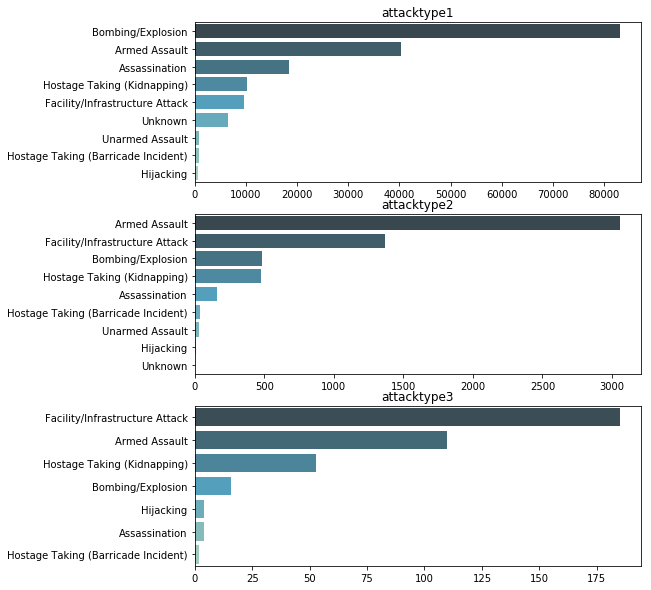

In [15]:
plt.figure(figsize=(8,10))

gs = gridspec.GridSpec(3, 1)

v_features = ['attacktype1_txt','attacktype2_txt','attacktype3_txt']

for i, cn in enumerate(terror[v_features]):
    ax = plt.subplot(gs[i])
    sns.barplot( y = terror[cn].value_counts().index,
            x = terror[cn].value_counts().values,
                palette="GnBu_d")
    ax.set_ylabel('')
    ax.set_title( str(cn)[0:11] )

Weapons used
    ---
    
Draw a visualisation showing the frequency of weapon type in each group:

['weaptype1_txt','weaptype2_txt','weaptype3_txt','weaptype4_txt']

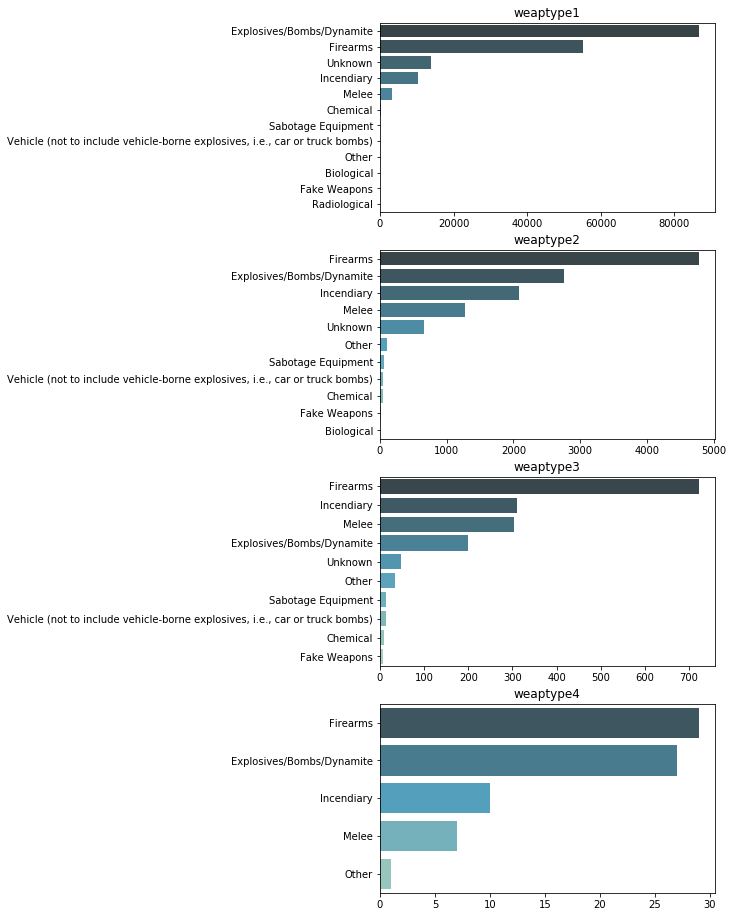

In [17]:
plt.figure(figsize=(6,16))
gs = gridspec.GridSpec(4, 1)
v_features = ['weaptype1_txt','weaptype2_txt','weaptype3_txt','weaptype4_txt']
for i, cn in enumerate(terror[v_features]):
    ax = plt.subplot(gs[i])
    sns.barplot( y = terror[cn].value_counts().index,
            x = terror[cn].value_counts().values,
                palette="GnBu_d")
    ax.set_ylabel('')
    ax.set_title( str(cn)[0:9] )

Who are affected?
      ---
Show the frequency of groups in following columns to highlight groups of people most affected. 

['targtype1_txt','targtype2_txt','targtype3_txt']

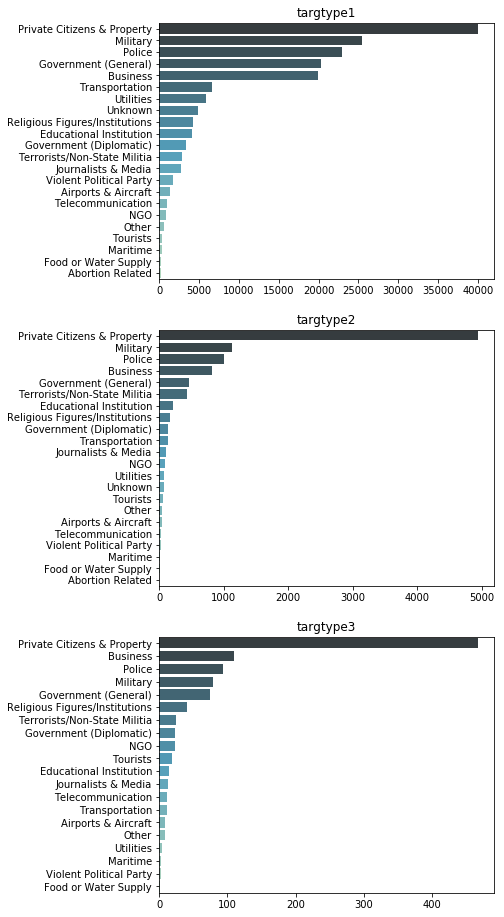

In [18]:
plt.figure(figsize=(6,16))
gs = gridspec.GridSpec(3, 1)
v_features = ['targtype1_txt','targtype2_txt','targtype3_txt']
for i, cn in enumerate(terror[v_features]):
    ax = plt.subplot(gs[i])
    sns.barplot( y = terror[cn].value_counts().index,
            x = terror[cn].value_counts().values,
                palette="GnBu_d")
    ax.set_ylabel('')
    ax.set_title( str(cn)[0:9] )

2 major attack types  are Bombing/Explosion and Armed Assaults which indicates the misuse of science and technolgy against Humanity
       ---
and Who has sufferred the most ?
> Citizens :- Seeing your loved one die because of terror attack can either incite passion among the youngsters to avenge the kiling or it leads to disintegration of society<br><br>

Lets take a look at the countries whose Citizens has seen these violent acts of terror the most 
                 ----

In [19]:
terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror_filter.groupby(['country_txt'])['targtype1_txt'].count()
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'No of incidents across the world to disrupt Private Citizens & Property',
         geo = dict(showframe = False,
         projection = {'type' : 'Mercator'}))

choromap3 = go.Figure(data = [data],layout=layout)
iplot(choromap3)

India , Pakistan and Afganistan has seen thousands of terrorists act which is a worrying factor
                ----

Terrorist Acts against Military 
      ---
Draw a choropleth map to show number of incidents in the world, carried out against military establishments.  

In [20]:
terror_filter = terror[terror['targtype1_txt'] == "Military"]
terror_filter = terror_filter.groupby(['country_txt'])['targtype1_txt'].count()

data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'No of incidents across the world to oppose their own Military',
         geo = dict(showframe = False,
         projection = {'type' : 'Mercator'}))

choromap3 = go.Figure(data = [data],layout=layout)
iplot(choromap3)

Terrorist Acts against Police
      ---
Draw a choropleth map to show number of incidents in the world, carried out against military establishments.  

In [21]:
terror_filter = terror[terror['targtype1_txt'] == "Police"]
terror_filter = terror_filter.groupby(['country_txt'])['targtype1_txt'].count()
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'No of incidents across the world to oppose Police',
         geo = dict(showframe = False,
         projection = {'type' : 'Mercator'}))

choromap3 = go.Figure(data = [data],layout=layout)
iplot(choromap3)

**Time Series analysis for target Types in Top 10 countries**
     ---

> Time Series analysis for target Type:- Private Citizens & Property
     ---

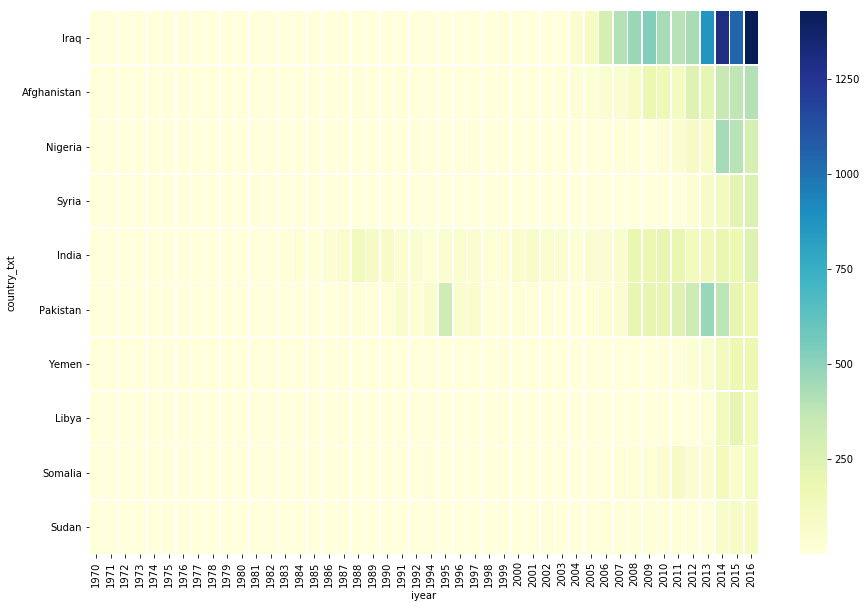

In [22]:
terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['targtype1_txt'].count().unstack()
#terror_filter.columns.name = None      
#terror_filter = terror_filter.reset_index()  
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

> Time Series analysis for target Type:- Military
     ---

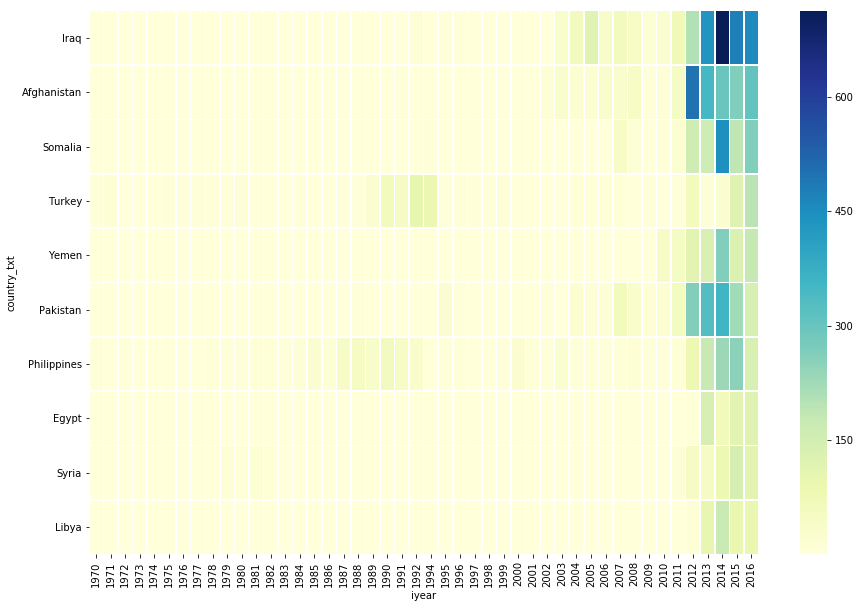

In [23]:
terror_filter = terror[terror['targtype1_txt'] == "Military"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['targtype1_txt'].count().unstack()
#terror_filter.columns.name = None      
#terror_filter = terror_filter.reset_index()  
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

> Time Series analysis for target Type:- Police
     ---

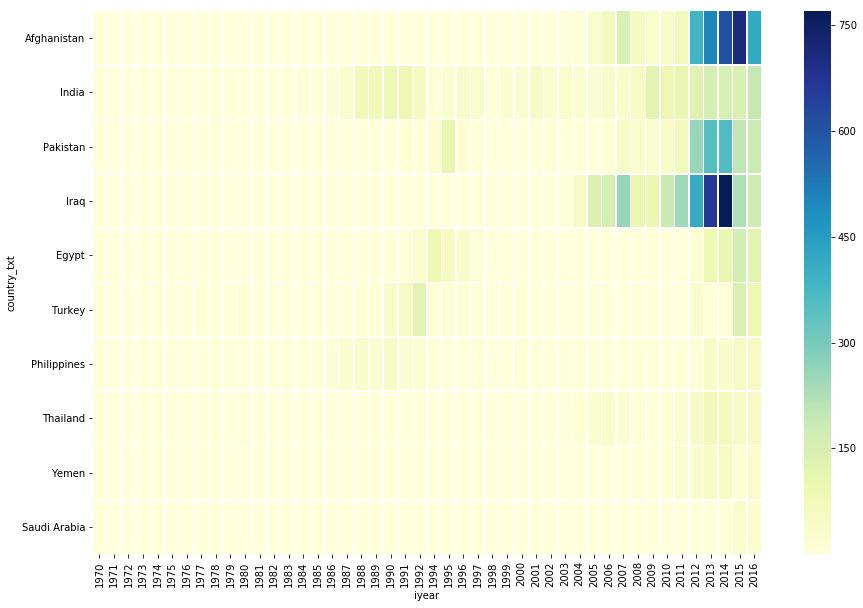

In [24]:
terror_filter = terror[terror['targtype1_txt'] == "Police"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['targtype1_txt'].count().unstack()
#terror_filter.columns.name = None      
#terror_filter = terror_filter.reset_index()  
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

We can see Iraq , Afaganistan and its neighbouring countries are constantly topping the charts in above 3 Heatmaps
        ---

**Folium Maps to show cities with Private Citizens & Property as a target by Terrorists**
        ---
 > click on the circle to know the name of the city and Circle radius is proportional to the no of incidents occured in that city 

1. Top 5 Indian Cities who has seen the terrorist acts the most
               ----

In [26]:
terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror[terror['country_txt'] == "India"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:5].values,
        'y': data_city['value'][0:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
            'size': data_city['value'][0:5]
              }
    }
]
iplot(data)
City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[28,81], tiles="Mapbox Bright", zoom_start=4.5)
for i in range(0,5):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*300,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

2. Top 5 Cities from Iraq who has seen the terrorist acts the most
               ----

In [27]:
terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror[terror['country_txt'] == "Iraq"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:5].values,
        'y': data_city['value'][0:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
            'size': data_city['value'][0:5]
              }
    }
]
iplot(data)
City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[33,44], tiles="Mapbox Bright", zoom_start=4.5)
for i in range(0,5):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*20,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

3. Top 5 Cities from Afaganistan who has seen the terrorist acts the most
               ----

In [28]:
terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror[terror['country_txt'] == "Afghanistan"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})

data = [
    {
        'x': data_city['city'][0:5].values,
        'y': data_city['value'][0:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
            'size': data_city['value'][0:5]
              }
    }
]
iplot(data)
City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[33,70], tiles="Mapbox Bright", zoom_start=4.5)
for i in range(0,5):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

4. Top 5 Cities from Pakistan who has seen the terrorist acts the most
               ----

In [29]:
terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror[terror['country_txt'] == "Pakistan"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})

data = [
    {
        'x': data_city['city'][0:5].values,
        'y': data_city['value'][0:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
            'size': data_city['value'][0:5]
              }
    }
]
iplot(data)

City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[28,70], tiles="Mapbox Bright", zoom_start=4.5)
for i in range(0,5):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

Top Terrorist Groups
        ---

In [33]:
# orgs = terror['gname'].value_counts().head(25).index

# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(14, 10))
# cmap = plt.get_cmap('coolwarm')

# map = Basemap(projection='cyl')
# map.drawmapboundary()
# map.fillcontinents(color='lightgray', zorder=1)
# org=['Taliban','Shining Path (SL)']
# #plt.scatter(5,15,s=50000,cmap=cmap,color = 'lightblue',marker='o', 
# #                   alpha=0.5, zorder=10)
# plt.text(-60,70,'Terrorist Groups',color='r',fontsize=15)
# plt.text(-60,65,'---------------------',color='r',fontsize=15)
# j=60
# for i in range(25) :
#    if i > 0 :
#      plt.text(-60,j,orgs[i],color='darkblue',fontsize=13)
#    j = j - 6
# plt.title('Top Terrorist Groups across the world')
# plt.show()

Lets analyze top 5 active terrorist organizations and their presence
        ---

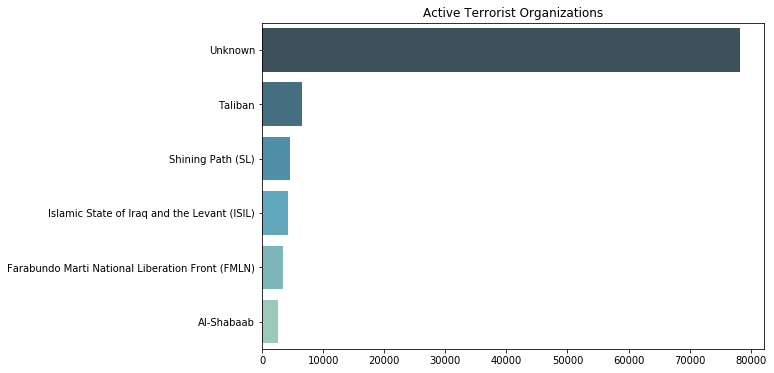

In [31]:
#terror['claimmode_txt'].value_counts()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.barplot( y = terror['gname'].value_counts().head(6).index,
            x = terror['gname'].value_counts().head(6).values,
                palette="GnBu_d")
ax.set_ylabel('')
ax.set_title('Active Terrorist Organizations' );

1) Taliban 
   ---

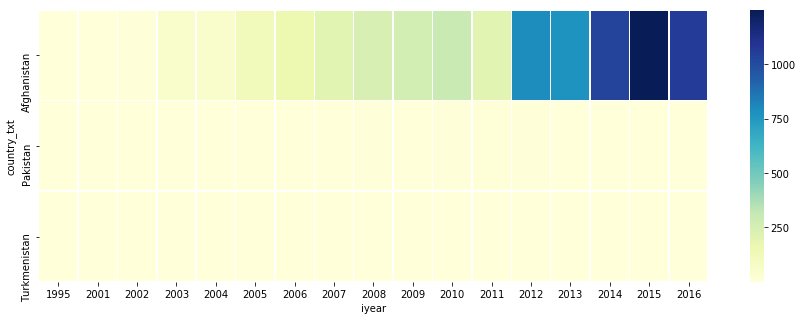

In [32]:
terror_filter = terror[terror['gname'] == "Taliban"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:3],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Taliban has waged a war against Afghanistan and the number of attacks have been increased in last few years
      ---

2) Shining Path (SL)
      ---

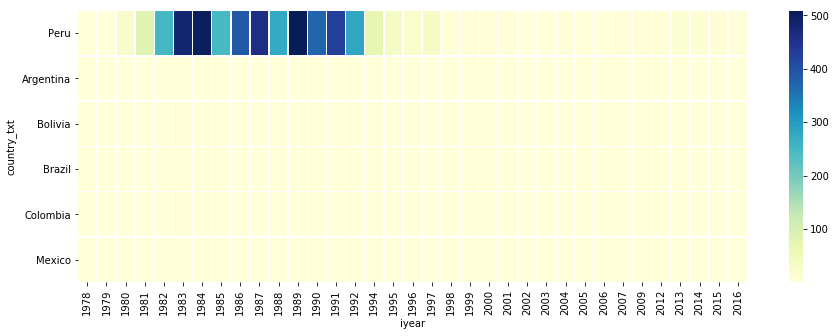

In [34]:
terror_filter = terror[terror['gname'] == "Shining Path (SL)"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Peru suffered the most at the hand of Shining path during 80s to 90s 
              ----

3) Islamic State of Iraq and the Levant (ISIL)
    ---

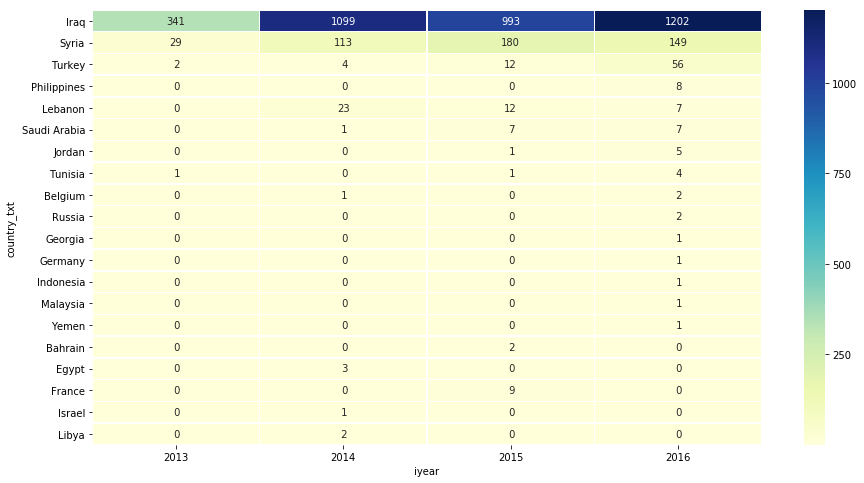

In [35]:
terror_filter = terror[terror['gname'] == "Islamic State of Iraq and the Levant (ISIL)"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15,8 )) 
g = sns.heatmap(terror_filter[0:20],annot=True,fmt="2.0f",cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

We all know the origin of this terror group but ISIL has started waging war against the neighbouring european countries too . We see Belgium and Russia has seen 2 incident in 2016. France has seen 9 attacks in the year 2015 
          ---

4) Farabundo Marti National Liberation Front (FMLN)
      ---

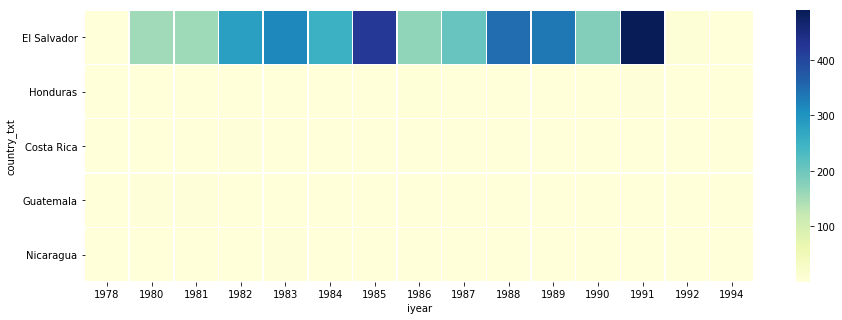

In [36]:
terror_filter = terror[terror['gname'] == "Farabundo Marti National Liberation Front (FMLN)"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values([1991], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Farabundo Marti National Liberation Front (FMLN) had given tough time to El Salvador between 80s - 90s
       ---

5) Al-Shabaab
        ---

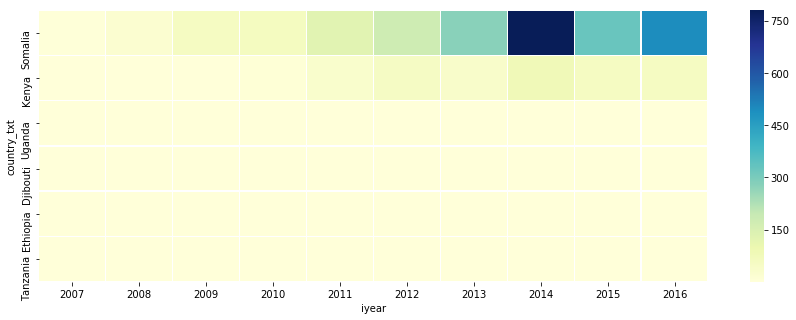

In [37]:
terror_filter = terror[terror['gname'] == "Al-Shabaab"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Al-Shabaab is latest terrorist organization and is constantly targetting Somalia
      ---

6) Boko Haram
     ---

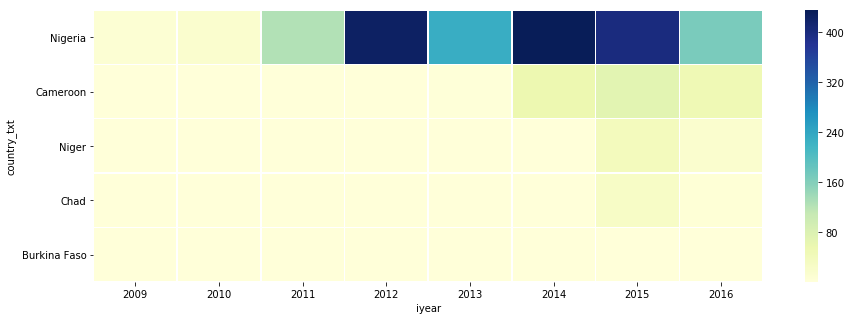

In [38]:
terror_filter = terror[terror['gname'] == "Boko Haram"]
terror_filter = terror_filter.groupby(['country_txt','iyear'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Boko Haram has constantly targetted Nigeria in last few years
       ----

Different modes used to assume responsibility of the attacks
       ----

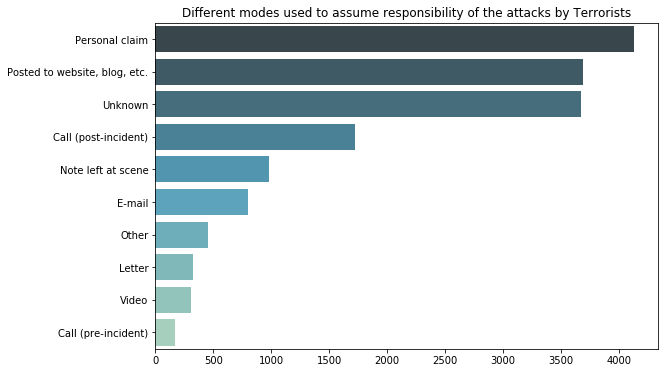

In [39]:
#terror['claimmode_txt'].value_counts()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.barplot( y = terror['claimmode_txt'].value_counts().index,
            x = terror['claimmode_txt'].value_counts().values,
                palette="GnBu_d")
ax.set_ylabel('')
ax.set_title('Different modes used to assume responsibility of the attacks by Terrorists' );

Heatmap Visualization to show Terrorist organizations using above mediums to assume responsibility of their henius act against humanity
         ---

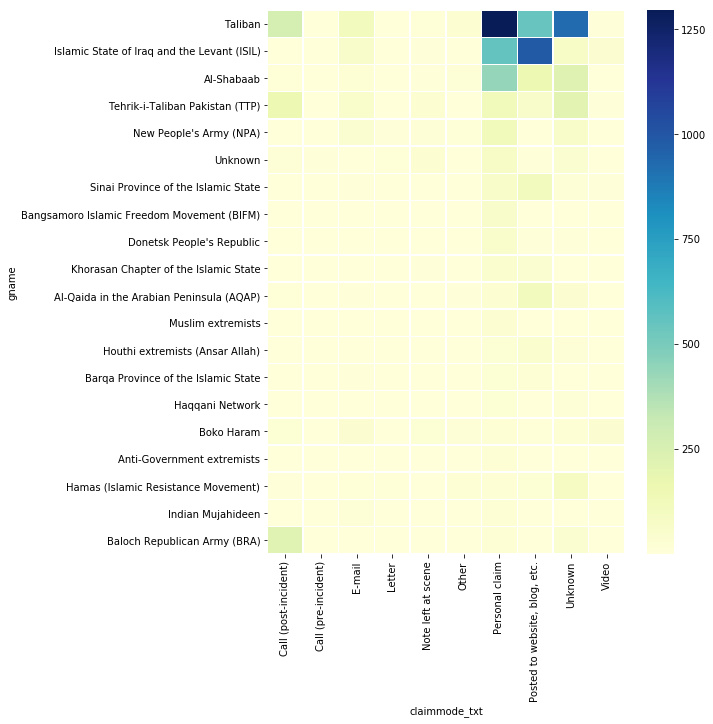

In [40]:
terror_filter = terror[['gname','claimmode_txt']]
terror_filter = terror_filter.groupby(['gname','claimmode_txt'])['gname'].count().unstack()
terror_filter = terror_filter.sort_values(['Personal claim','Posted to website, blog, etc.'], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(8, 10)) 
g = sns.heatmap(terror_filter[0:20],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Below top 4 Terrorist groups accepts their act personally or they have recruited educated young minds to post their act on Websites blog. whichever medium ensures spreading the news faster. <br>
            ---

**1) Taliban <br>
2) Islamic State of Iraq and the Levant (ISIL) <br>
3) Al-Shabaab <br>
4) Tehrik-i-Taliban Pakistan(TTP)**

Total confirmed fatalities as a direct result of attacks by Terrorists 
      ---
> **The number includes all victims and attackers who died as a direct result of the incident**
        

In [41]:
killed_terror = terror[['city','nkill']]
terror_filter = terror[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':killed_terror.dropna().groupby(['city'])['nkill'].sum().index,
   'value':killed_terror.dropna().groupby(['city'])['nkill'].sum().values
})

data_city = data_city.sort_values(['value'], ascending=False)

data = [
    {
        'x': data_city['city'][0:20].values,
        'y': data_city['value'][0:20].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
            'size': data_city['value'][0:20]
              }
    }
]
iplot(data)

City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
City_State = City_State.dropna()
count = City_State['value'].values
m = folium.Map(location=[28,2], tiles='stamentoner', zoom_start=2)
for i in range(0,100):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

Total number of injured 
      ---        

In [42]:
killed_terror = terror[['city','nwound']]
terror_filter = terror[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':killed_terror.dropna().groupby(['city'])['nwound'].sum().index,
   'value':killed_terror.dropna().groupby(['city'])['nwound'].sum().values
})

data_city = data_city.sort_values(['value'], ascending=False)

data = [
    {
        'x': data_city['city'][0:20].values,
        'y': data_city['value'][0:20].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
            'size': data_city['value'][0:20]
              }
    }
]
iplot(data)

City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
City_State = City_State.dropna()
count = City_State['value'].values
m = folium.Map(location=[28,2], tiles='stamentoner', zoom_start=2)
for i in range(0,50):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*50,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

Extent of Property Damage
       ----
> (aggrgated damage from 1970 to 2016)

In [43]:

terror_filter1 = terror[terror['propextent_txt'] == "Catastrophic (likely > $1 billion)"]
terror_filter1 = terror_filter1[['country_txt','propvalue','iyear']]
terror_filter1 = terror_filter1.fillna(terror_filter1.propvalue.mean())

terror_filter = terror[terror['propextent_txt'] == "Major (likely > $1 million but < $1 billion)"]
terror_filter = terror_filter[['country_txt','propvalue','iyear']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
terror_filter = terror_filter.append(terror_filter1)
terror_filter = terror_filter.groupby(['country_txt'])['propvalue'].sum()
                                      
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorbar = {'title': 'Property Damage in US $'})

layout = dict( title = 'Extent of Property Damage in US $ across the world',
         geo = dict(showframe = False,
         projection = {'type' : 'Mercator'}))

choromap3 = go.Figure(data = [data],layout=layout)
iplot(choromap3)

**cities and states from North America and Iraq are topping the list.**

Extent of Property Damage over the Years across all the countries
                  ----

 > Catastrophic (likely > $1 billion) 

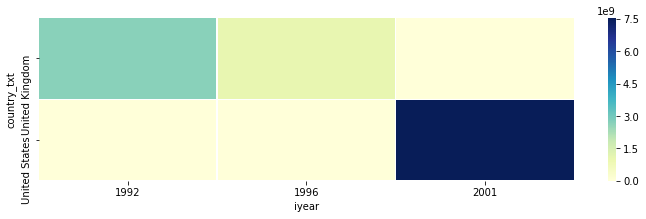

In [44]:
terror_filter = terror[terror['propextent_txt'] == "Catastrophic (likely > $1 billion)"]
terror_filter = terror_filter[['country_txt','propvalue','iyear']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
#terror_filter = terror_filter.append(terror_filter1)

terror_filter = terror_filter.groupby(['country_txt','iyear'])['propvalue'].sum().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(12,3)) 
g = sns.heatmap(terror_filter,cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

**9/11 attack in USA  in the Year 2001 is the deadliest attack ever since 1970 **

> Major (likely > $1 million but < $1 billion) 

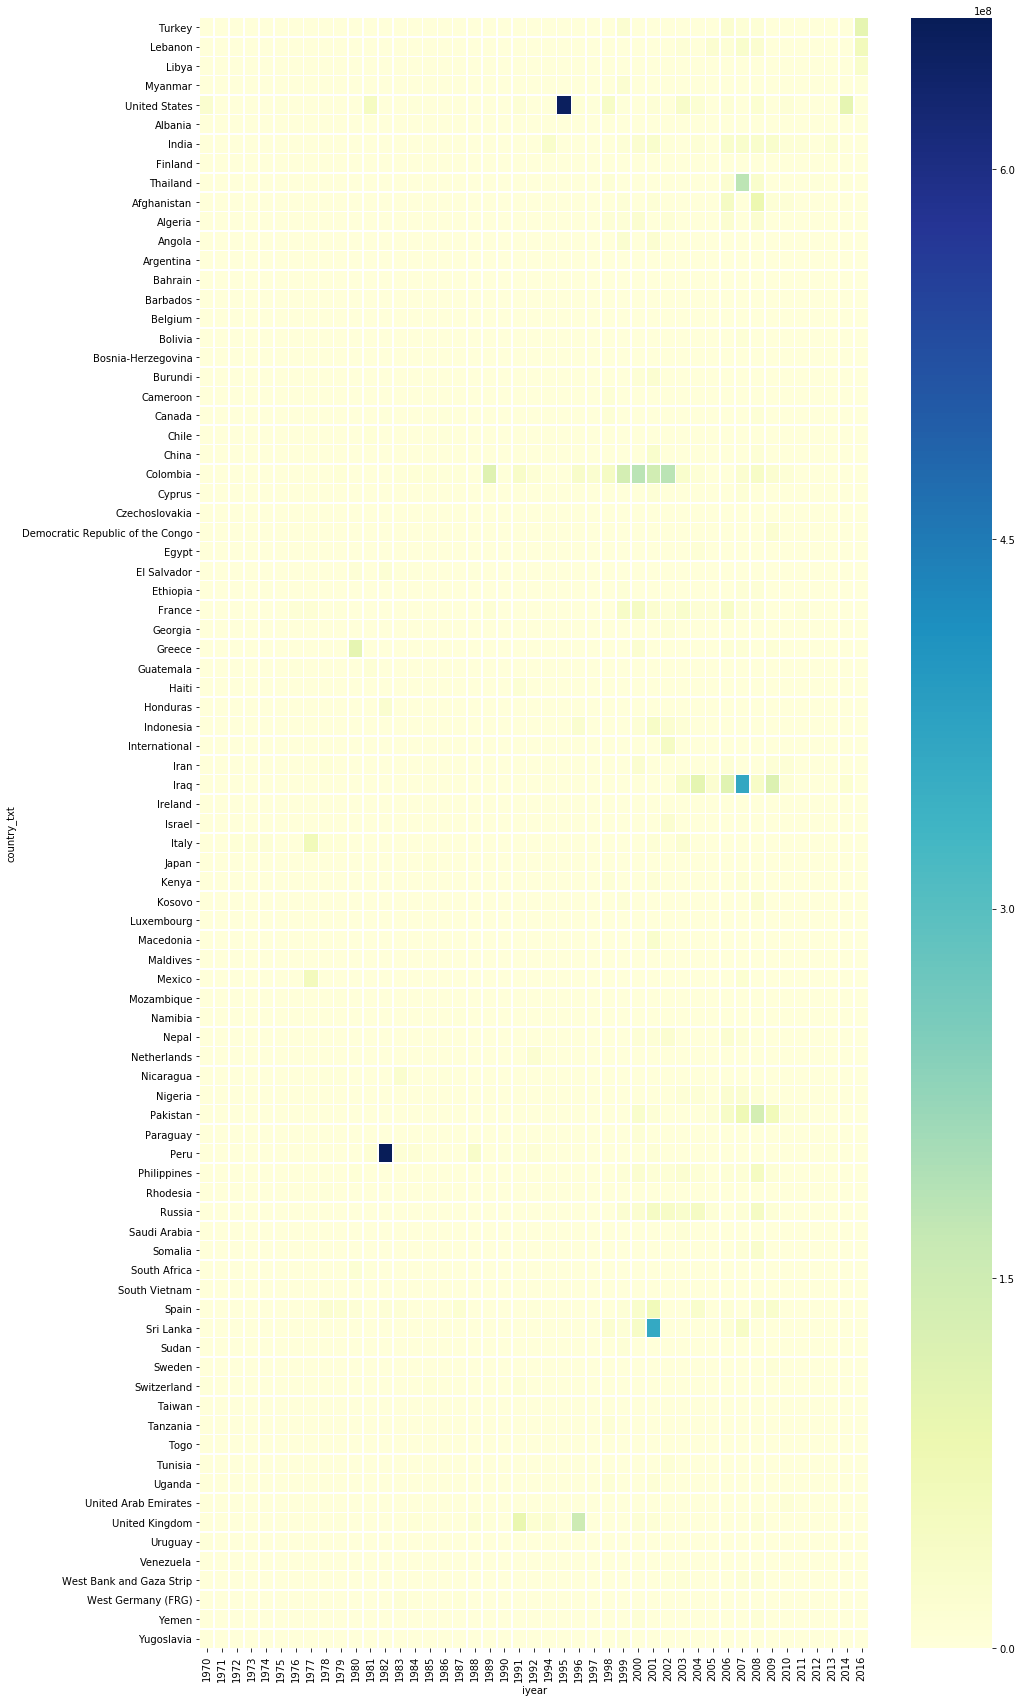

In [45]:
terror_filter = terror[terror['propextent_txt'] == "Major (likely > $1 million but < $1 billion)"]
terror_filter = terror_filter[['country_txt','propvalue','iyear']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
#terror_filter = terror_filter.append(terror_filter1)

terror_filter = terror_filter.groupby(['country_txt','iyear'])['propvalue'].sum().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 30)) 
g = sns.heatmap(terror_filter,cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

Extent of Property Damage over the Years across the globe
       ----

In [46]:
terror_filter = terror[terror['propextent_txt'] == "Major (likely > $1 million but < $1 billion)"]
#terror_filter = terror[terror['country_txt'] == "United States"]
terror_filter = terror_filter[['city','gname','propvalue','iyear']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
terror_filter = terror_filter.sort_values(['iyear'], ascending=False)
terror_filter = terror_filter.groupby(['iyear'])['propvalue'].sum()
data = [
    {
        'x': terror_filter.index,
        'y': terror_filter.values,
        'mode': 'lines',
        'marker': {
            'sizemode': 'area',
            'sizeref': 'sizeref',
           }
    }
]
iplot(data)

We see a ups and down in the graph , can we assume that great amount time is spent by terrorist organizations for mass destruction just before the peaks in this graph ? I will leave this question unanswered at this moment as it requires a great deal of time to find the exact reason.

In [54]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [52]:
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    return(nopunc)
    # Now just remove any stopwords
    #return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

df = terror[['motive','country_txt','iyear']]
df = df.dropna()
df = df.reset_index(drop=True)
df['motive'] = df['motive'].apply(text_process)

Shifting interests of Terrorists thru Timeline of Wordclouds 
            ----

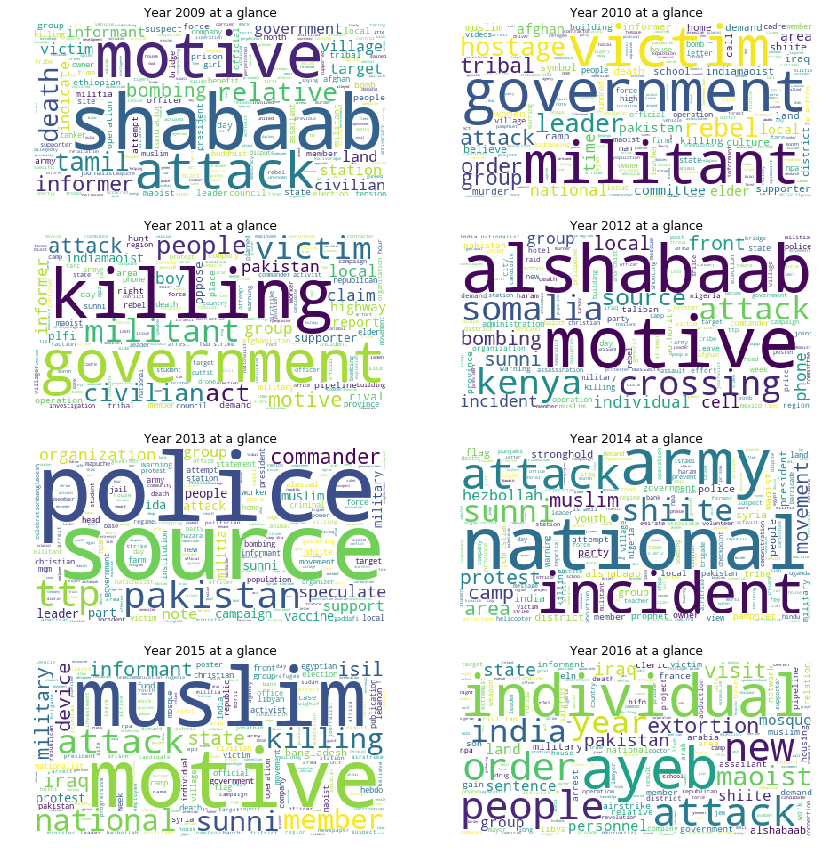

In [55]:
years = [2009,2010,2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(14,15))
gs = gridspec.GridSpec(4, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_country = df[df['iyear'] == cn]
    country_motive = df_country['motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title('Year ' + str(cn) + ' at a glance' )
    ax.axis('off')

Motive behind attacks on USA over the years (1970 to 2016 aggregated)
         ---

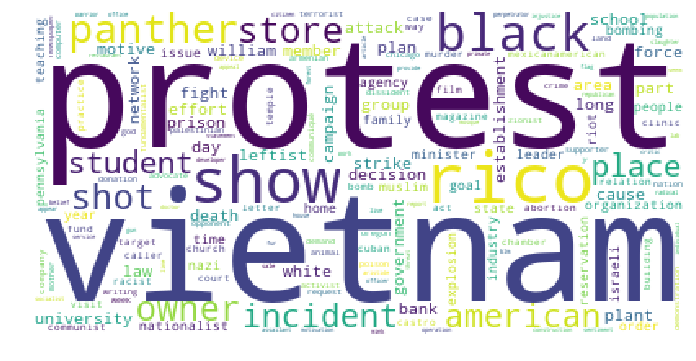

In [56]:
df_country = df[df['country_txt'] == 'United States']
#df_country = df[df['iyear'] == 2014]
country_motive = df_country['motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.show()

USA from 2011 to 2016
      ---

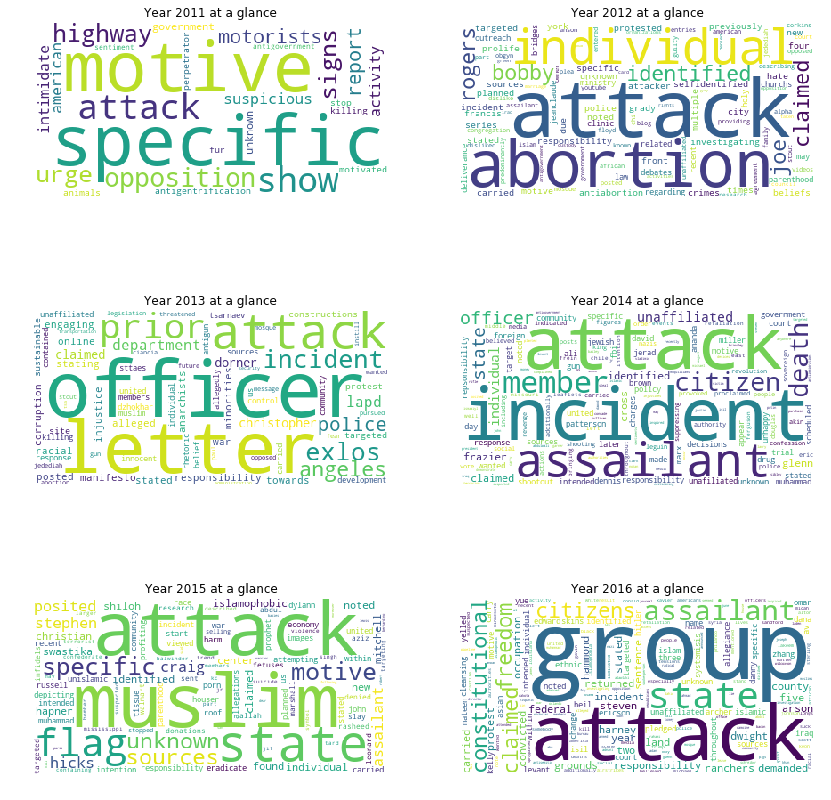

In [57]:
years = [2011,2012,2013,2014,2015,2016]
df_country = df[df['country_txt'] == 'United States']
plt.figure(figsize=(14,15))
gs = gridspec.GridSpec(3, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_time = df_country[df_country['iyear'] == cn]
    country_motive = df_time['motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title('Year ' + str(cn) + ' at a glance' )
    ax.axis('off')

Motive behind attacks on India over the years (1970 to 2016 aggregated)
         ---

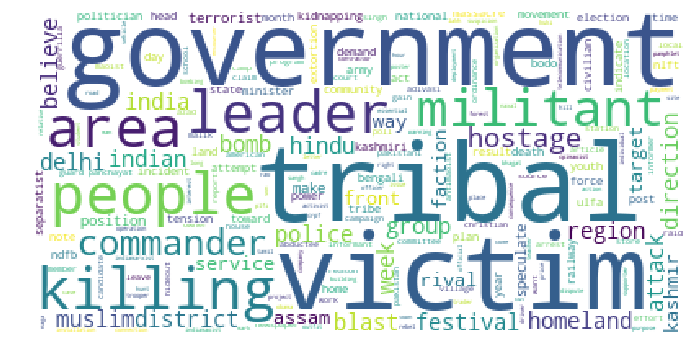

In [58]:
df_country = df[df['country_txt'] == 'India']
country_motive = df_country['motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.show()

India from 2011 to 2016
        ----

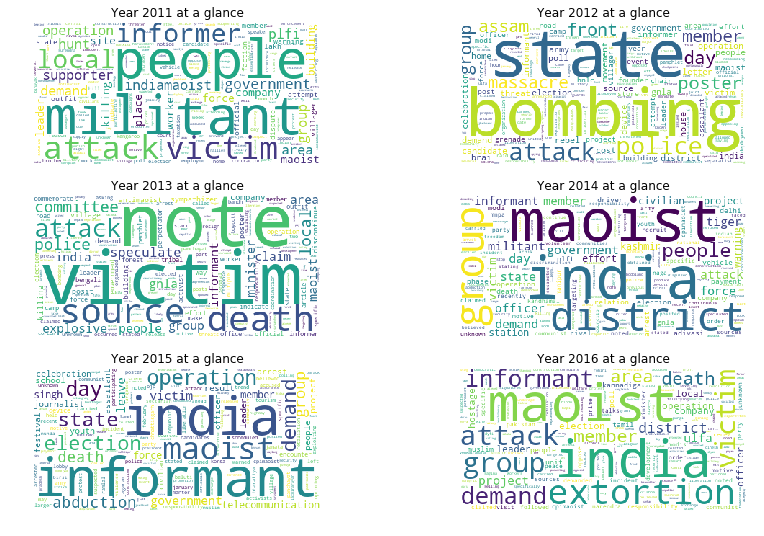

In [59]:
years = [2011,2012,2013,2014,2015,2016]
df_country = df[df['country_txt'] == 'India']
plt.figure(figsize=(14,9))
gs = gridspec.GridSpec(3, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_time = df_country[df_country['iyear'] == cn]
    country_motive = df_time['motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title('Year ' + str(cn) + ' at a glance' )
    ax.axis('off')

Maoist forces are in effect after 2014 , which is exactly when India saw change in hand at central government after a decade.
        ---

Suicide attacks conducted by various Terrorist organizations
     ---

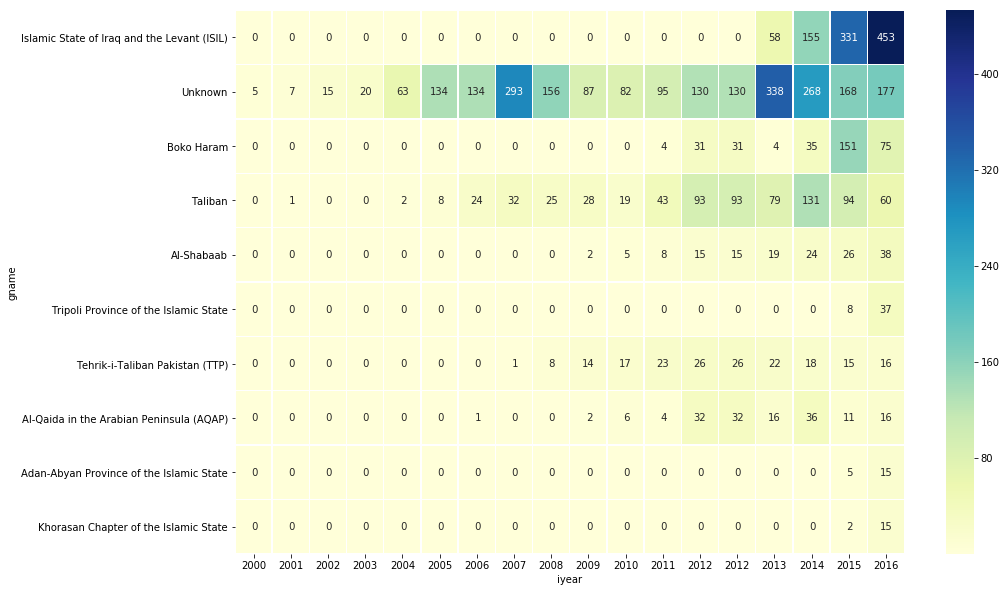

In [60]:
terror_filter = terror[terror['suicide'] == 1]
terror_filter = terror_filter.groupby(['gname','iyear'])['gname'].count().unstack()
terror_filter = terror_filter[[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2012,2013,2014,2015,2016]]
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter[0:10],annot=True,fmt="2.0f",cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

ISIL , Boko Haram and Taliban are the deadlist organizations World has ever witnessed . Look at the increasing numbers of suicide attacks from year 2013 till 2016 which is a worrying factor and it is likely to increase further.<br>
   ----
Why are these organizations deadliest  ?<br>
      ---
> if these terrorist organizations have managed to brainwash people in great numbers to make them believe that their sacrifice will earn them a position in Heaven then just imagine in coming years  they will succeed in building a big army which will be ready to lay down their life for their cause.


To be continued